In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/bhaskaradhikari/freelance/data/external/traffic_sources.csv')

In [42]:
df.head(20)

,event_date,user_pseudo_id,traffic_source_name,traffic_source_medium,traffic_source_source
0,20240123,1.803115e+09,(direct),(none),(direct)
1,20240123,1.370019e+09,(referral),referral,m.facebook.com
2,20240123,2.091432e+09,TNT_DPA - Interest - Prospecting,cpc,facebook
3,20240123,1.821760e+09,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook
4,20240123,1.665243e+09,TNT_Carousel/Image - Shopping - Retargeting,cpc,facebook
5,20240123,1.224651e+08,TNT_DPA - Interest - Prospecting,cpc,facebook
6,20240123,9.924966e+08,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook
7,20240123,9.924966e+08,TNT_Carousel/Image - Shopping - Prospecting,cpc,facebook
8,20240123,2.030970e+09,Suzuki ATV Parts,cpc,bing
9,20240123,2.030970e+09,Suzuki ATV Parts,cpc,bing


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:

# Basic analysis
print(df.describe(include='all'))
print("\nUnique values in each column:\n", df.nunique())



        event_date  user_pseudo_id  \
count       1000.0    1.000000e+03   
unique         NaN             NaN   
top            NaN             NaN   
freq           NaN             NaN   
mean    20240123.0    1.096343e+09   
std            0.0    6.371961e+08   
min     20240123.0    3.424610e+06   
25%     20240123.0    5.566898e+08   
50%     20240123.0    1.116745e+09   
75%     20240123.0    1.699906e+09   
max     20240123.0    2.145522e+09   

                                traffic_source_name traffic_source_medium  \
count                                           999                  1000   
unique                                           25                     6   
top     TNT_Carousel/Image - Shopping - Prospecting                   cpc   
freq                                            314                   742   
mean                                            NaN                   NaN   
std                                             NaN                   NaN   
min 

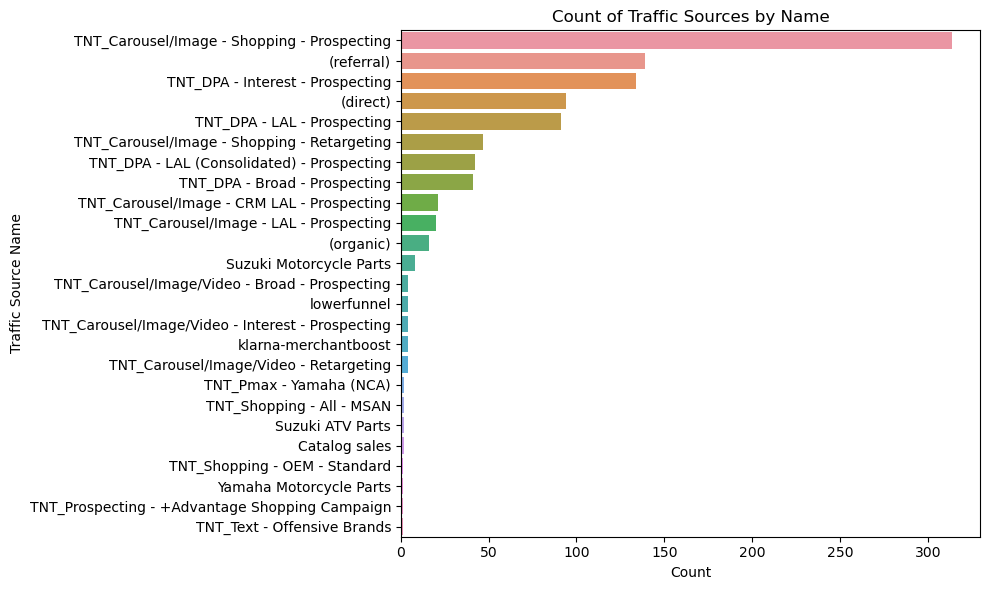

In [45]:
# Visualization 1: Count of traffic sources by name
plt.figure(figsize=(10, 6))
sns.countplot(y="traffic_source_name", data=df, order=df['traffic_source_name'].value_counts().index)
plt.title("Count of Traffic Sources by Name")
plt.xlabel("Count")
plt.ylabel("Traffic Source Name")
plt.tight_layout()
plt.show()


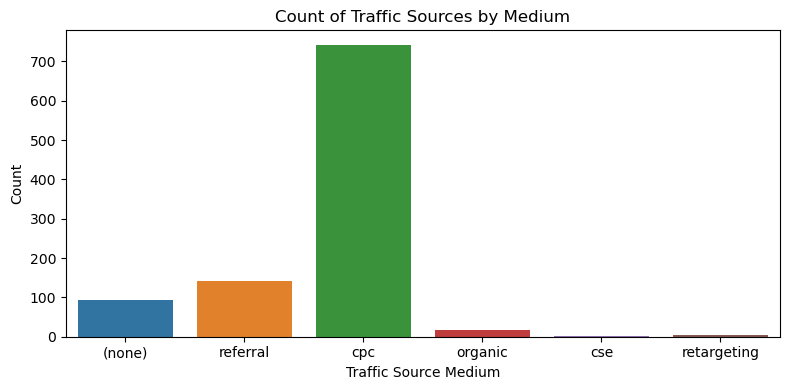

In [46]:

# Visualization 2: Count of traffic sources by medium
plt.figure(figsize=(8, 4))
sns.countplot(x="traffic_source_medium", data=df)
plt.title("Count of Traffic Sources by Medium")
plt.xlabel("Traffic Source Medium")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



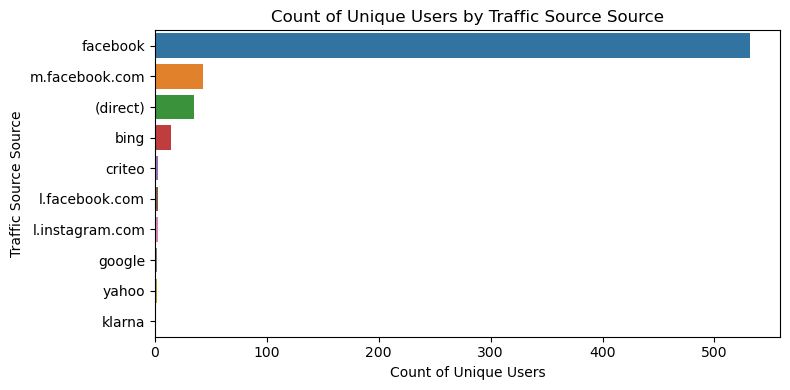

In [47]:
# Visualization 3: Count of unique users by traffic source source
traffic_source_users = df.groupby("traffic_source_source")["user_pseudo_id"].nunique().reset_index().sort_values(by="user_pseudo_id", ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x="user_pseudo_id", y="traffic_source_source", data=traffic_source_users)
plt.title("Count of Unique Users by Traffic Source Source")
plt.xlabel("Count of Unique Users")
plt.ylabel("Traffic Source Source")
plt.tight_layout()
plt.show()

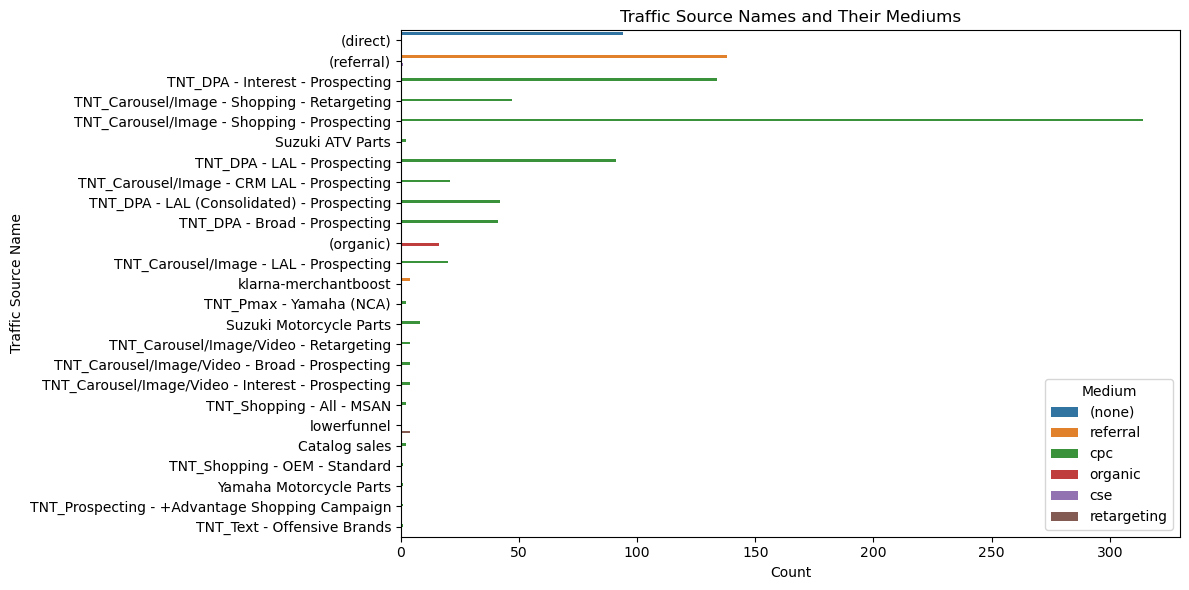

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(y="traffic_source_name", hue="traffic_source_medium", data=df)
plt.title("Traffic Source Names and Their Mediums")
plt.xlabel("Count")
plt.ylabel("Traffic Source Name")
plt.legend(title="Medium")
plt.tight_layout()
plt.show()

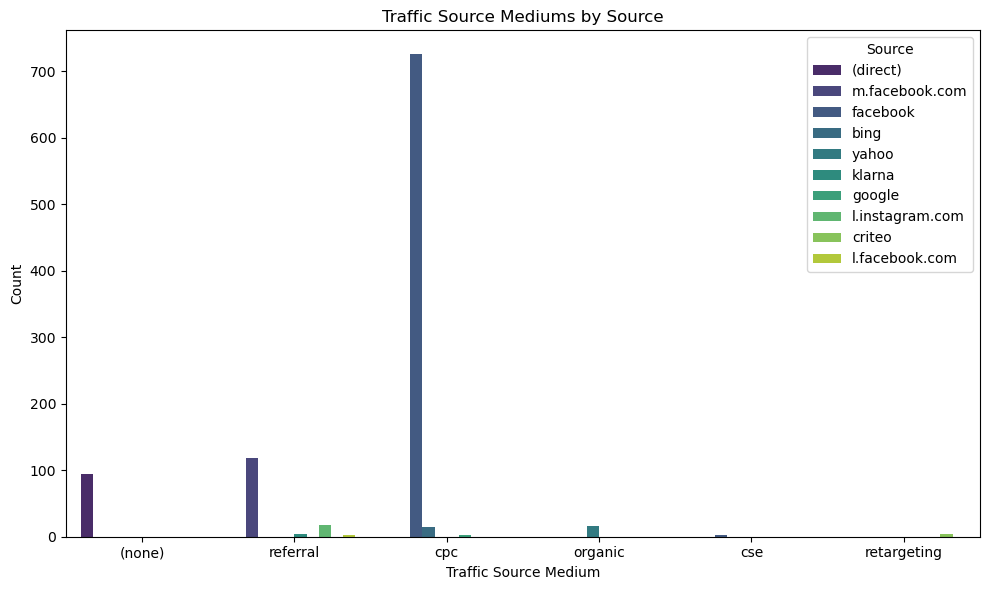

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x="traffic_source_medium", hue="traffic_source_source", data=df, palette="viridis")
plt.title("Traffic Source Mediums by Source")
plt.xlabel("Traffic Source Medium")
plt.ylabel("Count")
plt.legend(title="Source", loc="upper right")
plt.tight_layout()
plt.show()

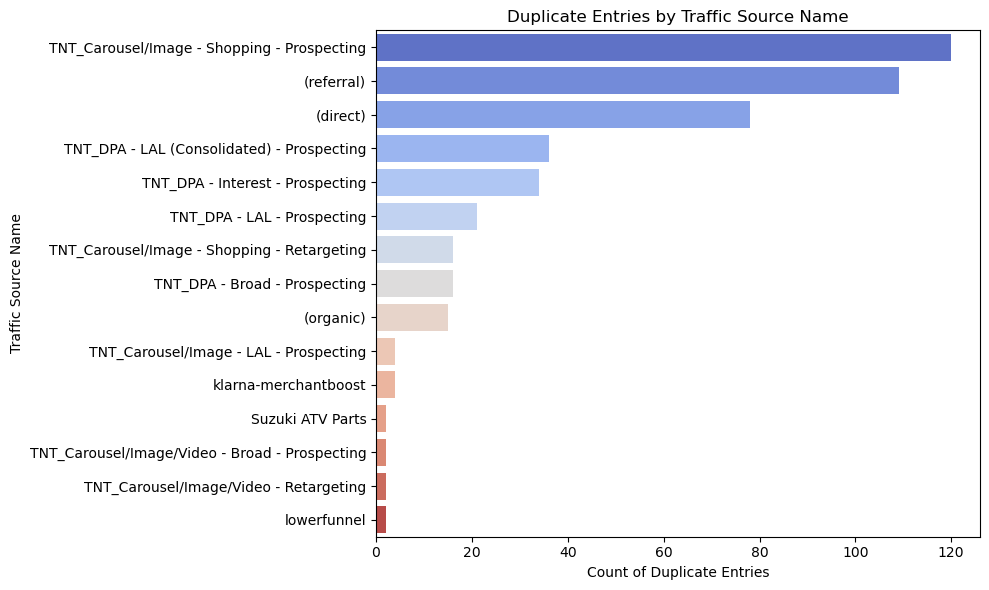

In [50]:
duplicate_entries = df.duplicated(subset=['user_pseudo_id', 'traffic_source_name'], keep=False)
df_duplicates = df[duplicate_entries].groupby("traffic_source_name").size().reset_index(name='count').sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="traffic_source_name", data=df_duplicates, palette="coolwarm")
plt.title("Duplicate Entries by Traffic Source Name")
plt.xlabel("Count of Duplicate Entries")
plt.ylabel("Traffic Source Name")
plt.tight_layout()
plt.show()